# Pre-Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [3]:
X=df[['LSTAT']].values
y=boston_data.target

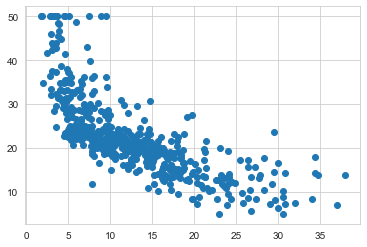

In [4]:
plt.scatter(X,y)

# Without Pre-processing

In [5]:
alpha=0.0001
w_ = np.zeros(1+X.shape[1])
cost_ = []
n_=100
for i in range (n_):
    y_pred=np.dot(X,w_[1:])+w_[0]
    errors=(y-y_pred)
    w_[1:]+=alpha*X.T.dot(errors)
    w_[0]+=alpha*errors.sum()
    cost=(errors**2).sum()/2.0
    cost_.append(cost)

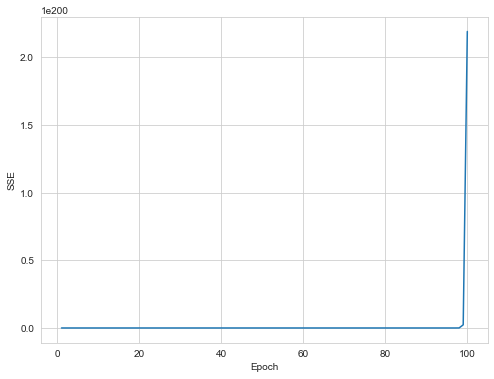

In [6]:
plt.figure(figsize=(8,6))
plt.plot(range(1,n_+1),cost_);
plt.ylabel('SSE')
plt.xlabel('Epoch');

# With Pre-processing

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y=StandardScaler()
X_std=sc_x.fit_transform(X)
y_std=sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [8]:
alpha=0.0001
w_ = np.zeros(1+X_std.shape[1])
cost_ = []
n_=100
for i in range (n_):
    y_pred=np.dot(X_std,w_[1:])+w_[0]
    errors=(y_std-y_pred)
    w_[1:]+=alpha*X_std.T.dot(errors)
    w_[0]+=alpha*errors.sum()
    cost=(errors**2).sum()/2.0
    cost_.append(cost)

Text(0.5, 0, 'Epoch')

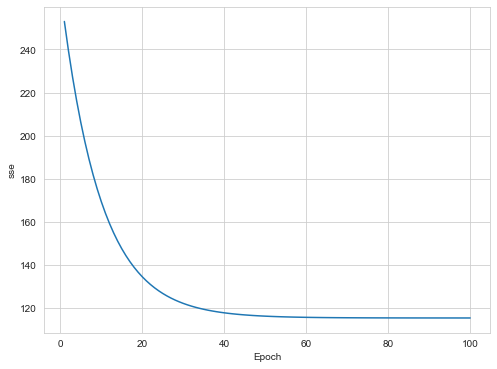

In [9]:
plt.figure(figsize=(8,6))
plt.plot(range(1,n_+1),cost_)
plt.ylabel('sse')
plt.xlabel('Epoch')

(array([ 75., 108.,  99.,  84.,  64.,  30.,  21.,  16.,   4.,   5.]),
 array([ 1.73 ,  5.354,  8.978, 12.602, 16.226, 19.85 , 23.474, 27.098,
        30.722, 34.346, 37.97 ]),
 <BarContainer object of 10 artists>)

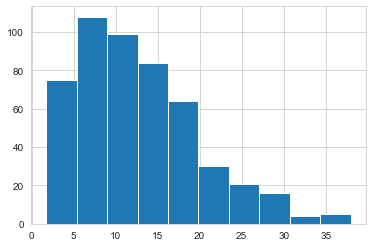

In [10]:
plt.hist(X)

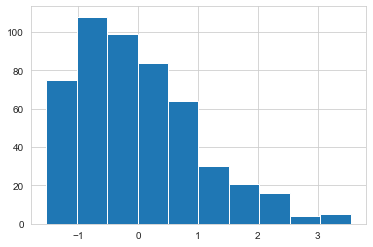

In [11]:
plt.hist(X_std);

In [12]:
from sklearn import preprocessing

In [13]:
X_train=np.array([[1,1,2],[2,0,0],[0,1,-1]])

In [14]:
X_scaled=preprocessing.scale(X_train)

In [15]:
X_scaled.std(axis=0)

array([1., 1., 1.])

In [16]:
X_scaled.mean(axis=0)

array([0.00000000e+00, 7.40148683e-17, 0.00000000e+00])

# MinMaxScaler

In [17]:
X_train=np.array([[1,1,2],[2,0,0],[0,1,-1]])

In [18]:
min_max_scaler=preprocessing.MinMaxScaler()

In [19]:
X_train_minmax=min_max_scaler.fit_transform(X_train)

In [20]:
X_train_minmax

array([[0.5       , 1.        , 1.        ],
       [1.        , 0.        , 0.33333333],
       [0.        , 1.        , 0.        ]])

Now to unseen data

In [25]:
X_test=np.array([[-3,-1,0],[2,1.5,4]])

In [26]:
X_test_minmax=min_max_scaler.transform(X_test)

In [27]:
X_test_minmax

array([[-1.5       , -1.        ,  0.33333333],
       [ 1.        ,  1.5       ,  1.66666667]])

# MaxAbsScaler

In [29]:
max_abs_scaler=preprocessing.MaxAbsScaler()
X_train_maxabs=max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5,  1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [30]:
X_test=np.array([[-1,0.5,2],[0,0.5,-0.6]])
X_test_maxabs=max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-0.5,  0.5,  1. ],
       [ 0. ,  0.5, -0.3]])

# Normalization

In [34]:
X_normalized=preprocessing.normalize(X_train,norm='l2')
X_normalized

array([[ 0.40824829,  0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [35]:
normalizer=preprocessing.Normalizer().fit(X_train)
normalizer

Normalizer()

In [37]:
normalizer.transform(X_train)

array([[ 0.40824829,  0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [38]:
normalizer.transform([[-1,1,0]])

array([[-0.70710678,  0.70710678,  0.        ]])

# Binarization

In [40]:
binarizer=preprocessing.Binarizer().fit(X_train)
binarizer

Binarizer()

In [41]:
binarizer.transform(X_train)

array([[1, 1, 1],
       [1, 0, 0],
       [0, 1, 0]])

# Modifying threshold

In [43]:
binarizer=preprocessing.Binarizer(threshold=-0.5)

In [45]:
binarizer.transform(X_train)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 0]])

# Encoding categorical features

In [46]:
source=['australia','singapore','new zealand', 'hong kong']

In [47]:
label_enc=preprocessing.LabelEncoder()
src=label_enc.fit_transform(source)

In [48]:
print("country to code mapping")
for k,v in enumerate(label_enc.classes_):
    print(v,'\t',k)

country to code mapping
australia 	 0
hong kong 	 1
new zealand 	 2
singapore 	 3


In [49]:
test_data=['hong kong','singapore','australia','new zealand']

In [50]:
result = encoder.transform(test_data)

NameError: name 'encoder' is not defined

In [51]:
print(result)

NameError: name 'result' is not defined

In [52]:
source

['australia', 'singapore', 'new zealand', 'hong kong']

In [53]:
src

array([0, 3, 2, 1], dtype=int64)

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
one_hot_enc=OneHotEncoder(sparse=False)
src=src.reshape(len(src),1)
one_hot=one_hot_enc.fit_transform(src)
print(one_hot)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [56]:
invert_res=label_enc.inverse_transform([np.argmax(one_hot[0,:])])
print(invert_res)

['australia']


In [57]:
invert_res=label_enc.inverse_transform([np.argmax(one_hot[3,:])])
print(invert_res)

['hong kong']
